In [2]:
from src import *
import random
import xgi
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
# H = xgi.random_hypergraph(100, [0.001, 0.0002, 0.00001])

H = xgi.Hypergraph([[0, 1, 2], [2, 3], [0, 3, 4, 5]])
# H = xgi.load_xgi_data("hospital-lyon", max_order=2)
# H.cleanup()
# mixed_ids = [
#     id
#     for id in H.edges
#     if {"PAT", "MED"} == set(H.nodes(list(H.edges.members(id))).attrs("type").aslist())
# ]
# len(mixed_ids)
# H = xgi.subhypergraph(H, edges=mixed_ids).copy()
# H.cleanup()
n = H.num_nodes
m = H.num_edges

I = full_incidence_matrix(H, n, m)

In [13]:
g_x = 0.15 * np.ones(n)
g_y = 0.07 * np.ones(m)
b_x = 0.25 * np.ones(n)
b_y = 0.5 * np.ones(m)
s_x = np.zeros(n)
s_y = np.zeros(m)

r1 = 1.5
r2 = 0.5
tau = 0.1
epsilon = 0.05
f = lambda e, x: (e.dot(x) / max(np.sum(e), 1) >= tau) * (1 - epsilon) + epsilon
g = lambda e, x: (e.dot(x) / max(np.sum(e), 1) >= tau)

s0 = 0.2
s_x[list(random.sample(range(n), int(s0 * n)))] = 1

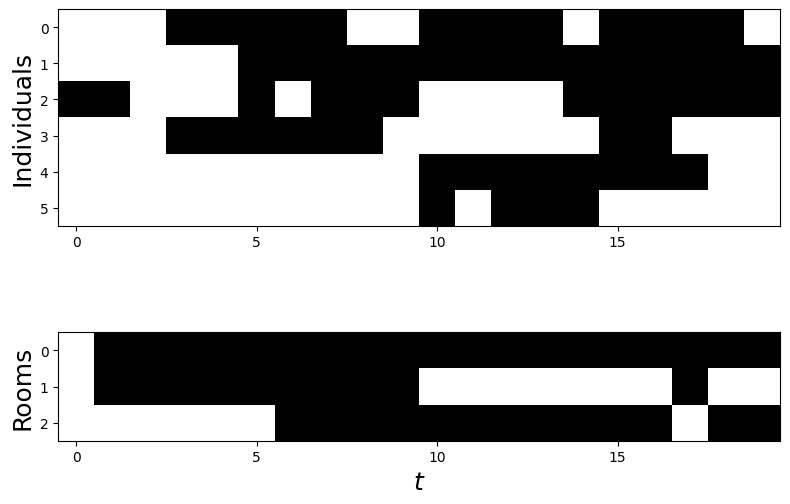

In [44]:
plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.spy(x.T)
ax = plt.gca()
ax.tick_params(
    left=True, bottom=True, labelleft=True, labelbottom=True, top=False, labeltop=False
)
plt.ylabel("Individuals", fontsize=18)
plt.subplot(212)
plt.spy(y.T)
ax = plt.gca()
ax.tick_params(
    left=True, bottom=True, labelleft=True, labelbottom=True, top=False, labeltop=False
)
plt.xlabel(r"$t$", fontsize=18)
plt.ylabel("Rooms", fontsize=18)
plt.tight_layout()
plt.savefig("Figures/infection_trace.png", dpi=1000)
plt.savefig("Figures/infection_trace.pdf", dpi=1000)
plt.show()

In [5]:
m_i1 = list()
m_i2 = list()
t_i1 = list()
t_i2 = list()
tmax = 100
for i in range(1):
    t1, Sp, Ip, Sr, Ir = simulate_c_diff_sis(
        H,
        gamma_p,
        gamma_r,
        beta_p,
        beta_r,
        f,
        g,
        person_status,
        room_status,
        tmin=0,
        tmax=tmax,
        dt=1,
    )
    m_i1.append(max(Ip))
    t_i1.append(np.argmax(Ip))
    t2, Sp2, Ip2 = simulate_c_diff_sis_flat(
        H, gamma_p, beta_p, f, person_status, tmin=0, tmax=tmax, dt=1
    )
    m_i2.append(max(Ip2))
    t_i2.append(np.argmax(Ip2))

NameError: name 'simulate_c_diff_sis' is not defined

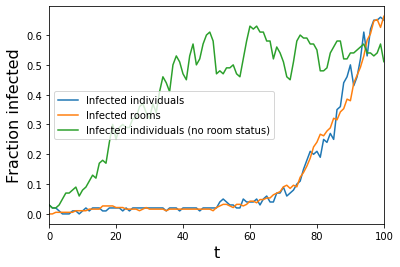

In [85]:
plt.figure()
plt.plot(t1, Ip / H.num_nodes, label="Infected individuals")
plt.plot(t1, Ir / H.num_edges, label="Infected rooms")
plt.plot(t2, Ip2 / H.num_nodes, label="Infected individuals (no room status)")
plt.ylabel("Fraction infected", fontsize=16)
plt.xlabel("t", fontsize=16)
plt.xlim([0, 100])
plt.legend()
plt.savefig("Figures/epi_curves.pdf", dpi=1000)
plt.savefig("Figures/epi_curves.png", dpi=1000)
plt.show()

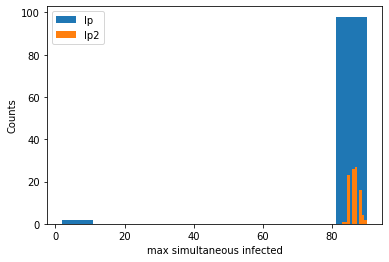

In [6]:
plt.figure()
plt.hist(m_i1, bins=10, label="Ip")
plt.hist(m_i2, bins=10, label="Ip2")
plt.ylabel("Counts")
plt.xlabel("max simultaneous infected")
plt.legend()
# plt.savefig("Figures/epi_curves.pdf", dpi=1000)
# plt.savefig("Figures/epi_curves.png", dpi=1000)
plt.show()

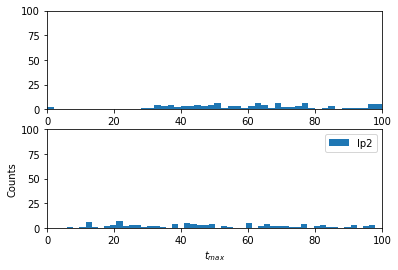

In [7]:
plt.figure()
plt.subplot(211)
plt.hist(t_i1, bins=50, label="Ip")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.subplot(212)
plt.hist(t_i2, bins=50, label="Ip2")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.ylabel("Counts")
plt.xlabel(r"$t_{max}$")
plt.legend()
# plt.savefig("Figures/epi_curves.pdf", dpi=1000)
# plt.savefig("Figures/epi_curves.png", dpi=1000)
plt.show()